In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(5)

In [3]:
df = pd.read_csv("../data/train_embedded_bert.csv")
df["sentence_embedding"] = df["sentence_embedding"].apply(lambda x : np.array([float(value) for value in x[1:-1].split(",")]))

In [4]:
X = np.zeros(shape = (len(df),768))
for i in range(len(df)) :
    X[i] = df["sentence_embedding"].values[i]

In [5]:
X.shape

(12120, 768)

In [6]:
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X)

In [7]:
df["PC1"] = pc[:,0]
df["PC2"] = pc[:,1]

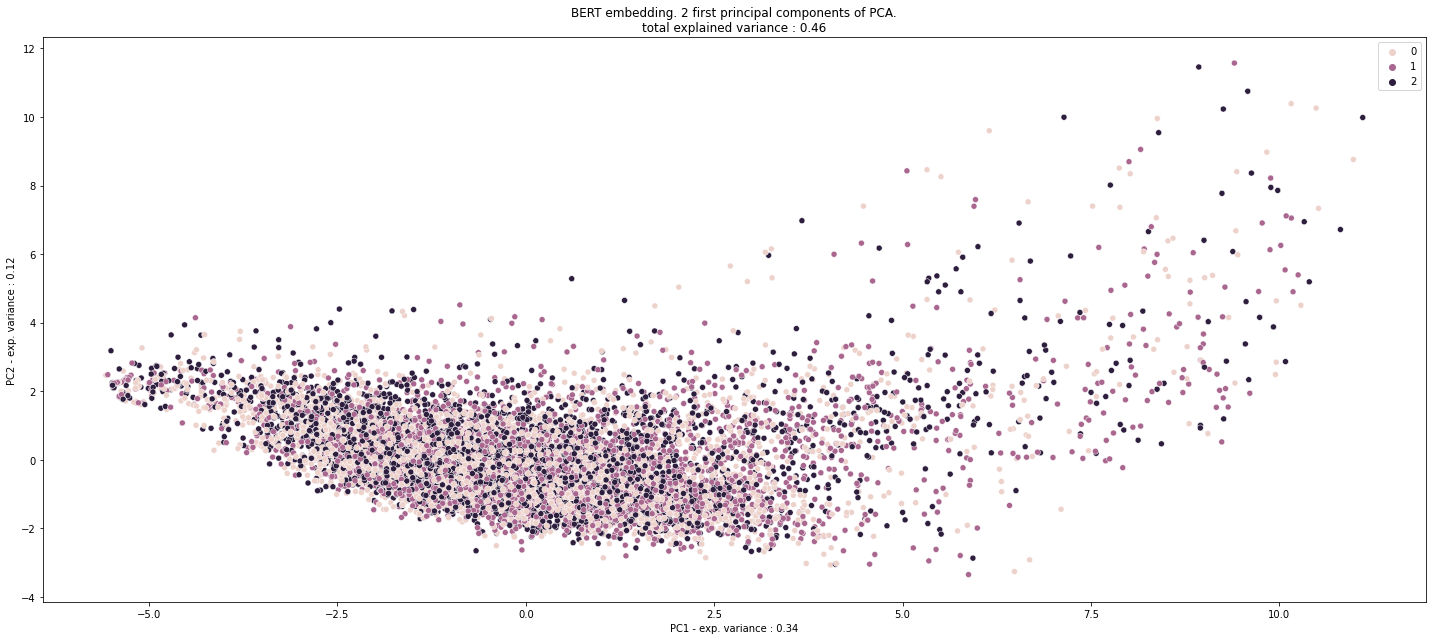

In [24]:
plt.figure(figsize=(20,9))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="label")
plt.title("BERT embedding. 2 first principal components of PCA.\ntotal explained variance : {}".format(np.round(pca.explained_variance_ratio_.sum(),2)))
plt.xlabel("PC1 - exp. variance : {}".format(np.round(pca.explained_variance_ratio_[0],2)))
plt.ylabel("PC2 - exp. variance : {}".format(np.round(pca.explained_variance_ratio_[1],2)))
plt.legend()
plt.tight_layout()
plt.savefig("../data/PCA_BERT_embedding.jpg")
plt.show()

In [9]:
y = np.zeros(shape=(len(df)))
for i in range(len(df)):
    y[i] = df["label"].values[i]
y = y.astype(int)

In [20]:
pca2 = decomposition.KernelPCA(n_components=2,kernel="rbf",gamma=np.sqrt(np.var(X)))
pc2 = pca2.fit_transform(X,y=y)

In [21]:
df["PC1_2"] = pc2[:,0]
df["PC2_2"] = pc2[:,1]

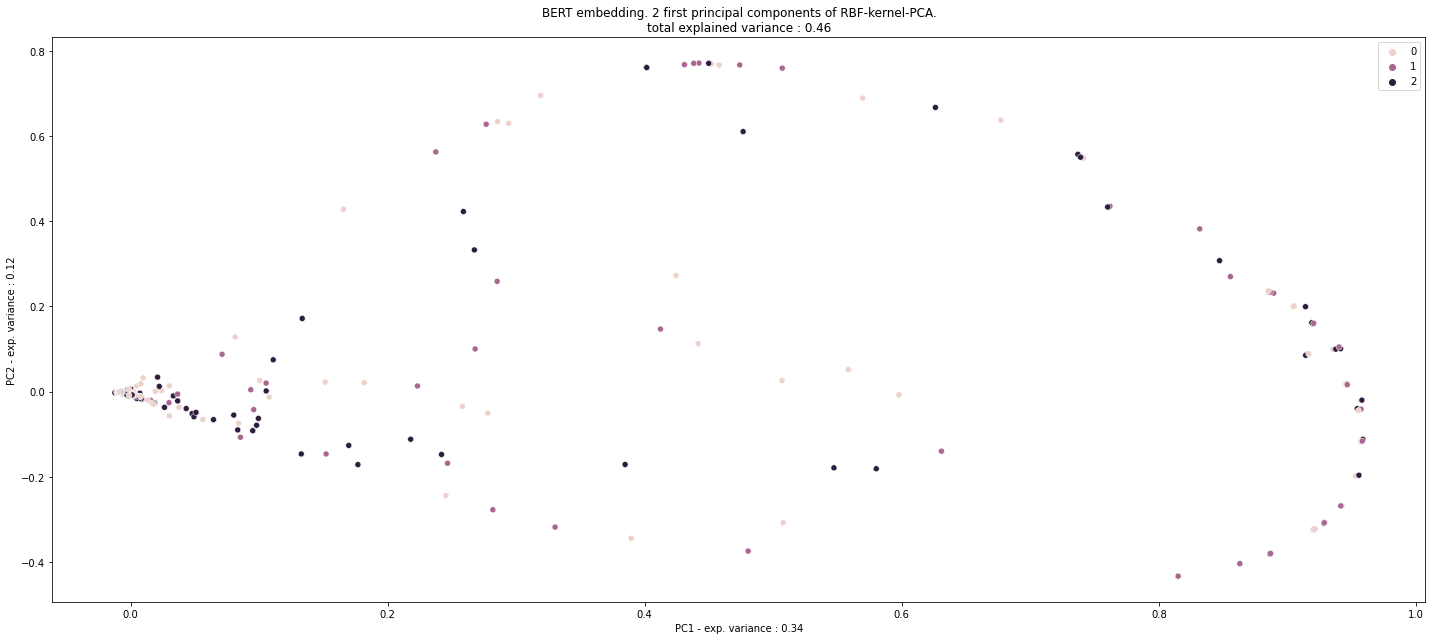

In [25]:
plt.figure(figsize=(20,9))
sns.scatterplot(data=df, x="PC1_2", y="PC2_2", hue="label")
plt.title("BERT embedding. 2 first principal components of RBF-kernel-PCA.\ntotal explained variance : {}".format(np.round(pca.explained_variance_ratio_.sum(),2)))
plt.xlabel("PC1 - exp. variance : {}".format(np.round(pca.explained_variance_ratio_[0],2)))
plt.ylabel("PC2 - exp. variance : {}".format(np.round(pca.explained_variance_ratio_[1],2)))
plt.legend()
plt.tight_layout()
plt.savefig("../data/RBFkPCA_BERT_embedding.jpg")
plt.show()